## Evaluation Regression Model Performance with R-Square

Modelimizi oluşturduktan sonra .predict() metodu ile tahminler yapıyorduk. Bu tahminlerin ne kadar doğru olduğunu anlayabilmemiz için değerlendirme metriği bulunmaktadır.

R-square, elde ettiğimiz regression modelin performansını değerlendirmek için kullandığımız bir metriktir.

Regression modelin performansı yaptığı tahminlerin doğruluğuna bağlıdır.

### R-SQUARE

<img src="r_square.png" style="width:900px;height:400px"/>

Eğer line, data'ya çok iyi fit edilmiş ise SSR değeri çok düşük olacaktır hatta 0 olacaktır. 

r_square = 1-(SSR/SST) formülünde SSR=0 olduğu durumda 0/SST=0 olacaktır ve 1-0=1 sonucu elde edilir. r_square=1 olacaktır. Dolayısıyla r_square'nin en iyi değeri 1'dir.

## R-Square with Random Forest

Şimdi 6-RandomForestRegression isimli dökümanda yazdığımız kodu buraya alarak, random forest modelinin doğruluğunu değerlendirelim.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("random_forest_regression_dataset.csv",sep=";", header=None)
df

,0,1
0,1,100
1,2,80
2,3,70
3,4,60
4,5,50
5,6,40
6,7,30
7,8,20
8,9,10
9,10,5


In [4]:
x = df.iloc[:,0].values.reshape(-1,1)
y = df.iloc[:,1].values.reshape(-1,1)

In [5]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100 , random_state=42)
rf.fit(x,y)

y_head = rf.predict(x)

C:\Users\raziy\AppData\Local\Temp/ipykernel_11296/3247437859.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x,y)


y_head = rf.predict(x) satırında tahmin etmek için modeli eğittiğimiz data'yı kullanıyoruz. Bu çok mantıklı değil çünkü model eğitim gördüğü data'ları tanıdığı için bu data'nın değerinide kolaylıkla tahmin edebilecektir. İlerde tahminleri test data'sı üzerinden yapacağız. 

Şimdi tahminlerin, gerçek değerlere göre ne kadar doğru olduğunu r-square metriği ile değerlendirelim.

In [7]:
from sklearn.metrics import r2_score

print("r_score",r2_score(y,y_head))

r_score 0.9798724794092587


r2_score(y,y_head) ifadesindeki parametreler:

    1.parametre: Gerçek y değerleridir. Yani veri setindeki y değerleridir.
    
    2.parametre: Tahmin edilen y değerleridir.

<br><br>
Çıktıya baktığımızda r_score değerinin 0.97 olduğunu görüyoruz. 1'e yakın bir değer elde ettik dolayısıyla gayet güzel tahminler gerçekleştirilmiştir.

## R-Square with Linear Regression

Şimdi de 1-LinearRegression isimli dökümanda yazdığımız kodu buraya alarak, Linear Regression modelinin doğruluğunu değerlendirelim.

In [9]:
df = pd.read_csv("linear_regression_dataset.csv", sep=";")
df

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000
5,4.0,6900
6,15.0,20000
7,7.0,8500
8,3.0,6000
9,2.0,3500


In [10]:
x = df.deneyim.values.reshape(-1,1)

y = df.maas.values.reshape(-1,1)

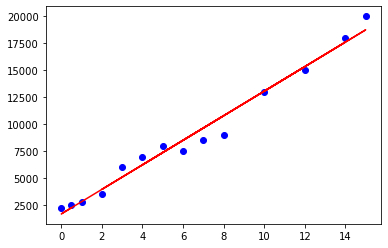

In [15]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(x,y)

y_head = linear_reg.predict(x)

plt.scatter(x,y,color="blue")

plt.plot(x,y_head,color="red")
plt.show()

Görsele baktığımızda tahminlerin doğruluk değerlerinin yüksek olduğunu anlayabiliyoruz. Şimdi r_square metriği ile doğruluk değerini sayısal olarak görelim.

In [16]:
from sklearn.metrics import r2_score

print("r_square score: ",r2_score(y,y_head))

r_square score:  0.9775283164949902


0.97 değerinden anlayacağımız üzere, linear regression modeli data'yı gerçekten ifade edebiliyor.